# load_ssp_library

> Loading stellar spectral library

In [ ]:
#| default_exp load_ssp_library

In [ ]:
#| hide
from nbdev.showdoc import *

In [ ]:
#| export
import numpy as np
import os
import matplotlib.pylab as plt

In [ ]:
#| export
def load_fsps_spectral_library(dirIn = '/lcrc/project/cosmo_ai/nramachandra/Projects/SPHEREx/MAH/nersc_data/portal.nersc.gov/project/hacc/aphearin/dsps_data/FSPS_ssp_data'
): 
    spec_flux = np.load(os.path.join(dirIn, "ssp_spec_flux_lines.npy"))
    spec_wave = np.load(os.path.join(dirIn, "ssp_spec_wave.npy"))
    print('Library shape: ', spec_flux.shape) 
    print('Wavelength shape: ', spec_wave.shape)
    return spec_flux, spec_wave

In [ ]:
#| export
def _load_fsps_age(dirIn):
    log_age_gyr = np.load(os.path.join(dirIn, "log_age.npy")) - 9
    age_fsps_gyr = 10**log_age_gyr
    ## (age is in 1/H0 units)
    return age_fsps_gyr

In [ ]:
#| export
def _load_fsps_metallicity(dirIn, Z_solar):
    Z_legend = np.load(os.path.join(dirIn, "zlegend.npy"))
    Z_padova = Z_legend/Z_solar
    return Z_padova

In [ ]:
#| export
def load_fsps_age_metallicity(dirIn = '/lcrc/project/cosmo_ai/nramachandra/Projects/SPHEREx/MAH/nersc_data/portal.nersc.gov/project/hacc/aphearin/dsps_data/FSPS_ssp_data'):
    
    age_fsps_gyr = _load_fsps_age(dirIn)
    
    Z_solar_padova = 0.019
    Z_padova = _load_fsps_metallicity(dirIn, Z_solar_padova)
    
    return age_fsps_gyr, Z_padova

Library shape:  (22, 94, 1963)
Wavelength shape:  (1963,)


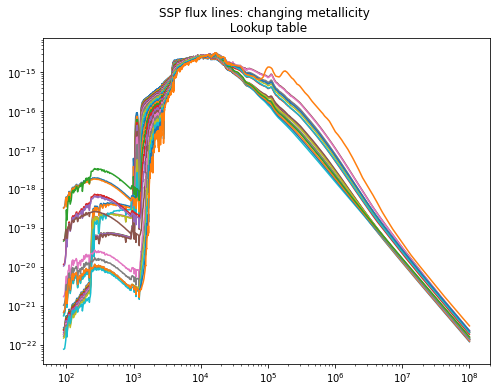

In [ ]:
#| hide

spec_flux, spec_wave = load_fsps_spectral_library()

age_fsps_gyr, Z_padova = load_fsps_age_metallicity()

plt.figure(figsize=(8, 6))

for ind0 in range(Z_padova.shape[0]):
    plt.plot(spec_wave, spec_flux[ind0, 70])
plt.xscale('log')
plt.yscale('log')
plt.title('SSP flux lines: changing metallicity \n Lookup table')

plt.show()

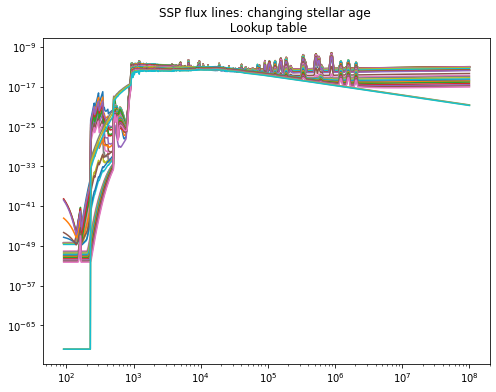

In [ ]:
#| hide

plt.figure(figsize=(8, 6))

for ind1 in range(10, 40):
    plt.plot(spec_wave, spec_flux[20, ind1])
plt.xscale('log')
plt.yscale('log')
plt.title('SSP flux lines: changing stellar age \n Lookup table')


plt.show()

In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()